# Normal Distribution Statistically Testing


In [1]:
# Importing packages we will be using
from scipy.stats import shapiro
from scipy.stats import anderson
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%store -r transformed_data


## The Shapiro-Wilk test

The Shapiro-Wilk test is a statistical test used to check if a dataset follows a normal distribution. It compares the observed data with the values expected under the assumption of normality.  
The test calculates a test statistic ($W$) that ranges between $0$ and $1$. A value close to $1$ indicates strong conformity to a normal distribution.
The test also provides a p-value, which measures the strength of evidence against the null hypothesis.  
The null hypothesis ($H0$) assumes that the data is normally distributed, while the alternative hypothesis ($H1$) suggests otherwise. By comparing the p-value to a predetermined significance level (e.g., $0.05$), the test determines whether to reject or fail to reject the null hypothesis.


In [2]:
# Let's create our shapiro-wilk test function
def shapiro_test(data):
    lst_stats, p_vals = [], []
    for col in data.columns:
        statistic, p_val = shapiro(data)
        lst_stats.append(statistic)
        p_vals.append(p_val)
    return p_vals, lst_stats


# Let's get the p-values and
p_values, lst_stats = shapiro_test(transformed_data)
print(lst_stats)
print(p_values)


[0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125, 0.991729736328125]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


d:\Programms\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As we notice, all the p-values of the Shapiro-Wilk test are zeroes, so we will reject the null hypothesis, which means that our features aren't normal due to Shapiro-Wilk test.  
The interpretation of results from the Shapiro-Wilk test is sensitive to departures from normality, including deviations in skewness, kurtosis, or multimodality. If the data exhibits significant deviations from normality in these aspects, it may impact the validity of the test.


## Q-Q Plots

Q-Q plots, or quantile-quantile plots, are used to assess whether a dataset follows a specific theoretical distribution, such as the normal distribution. The plot compares the observed quantiles of the data to the expected quantiles of the theoretical distribution.  
A good fit between the data and the theoretical distribution is indicated by the points on the plot falling approximately along a straight line. Deviations from the straight line suggest departures from the assumed distribution.


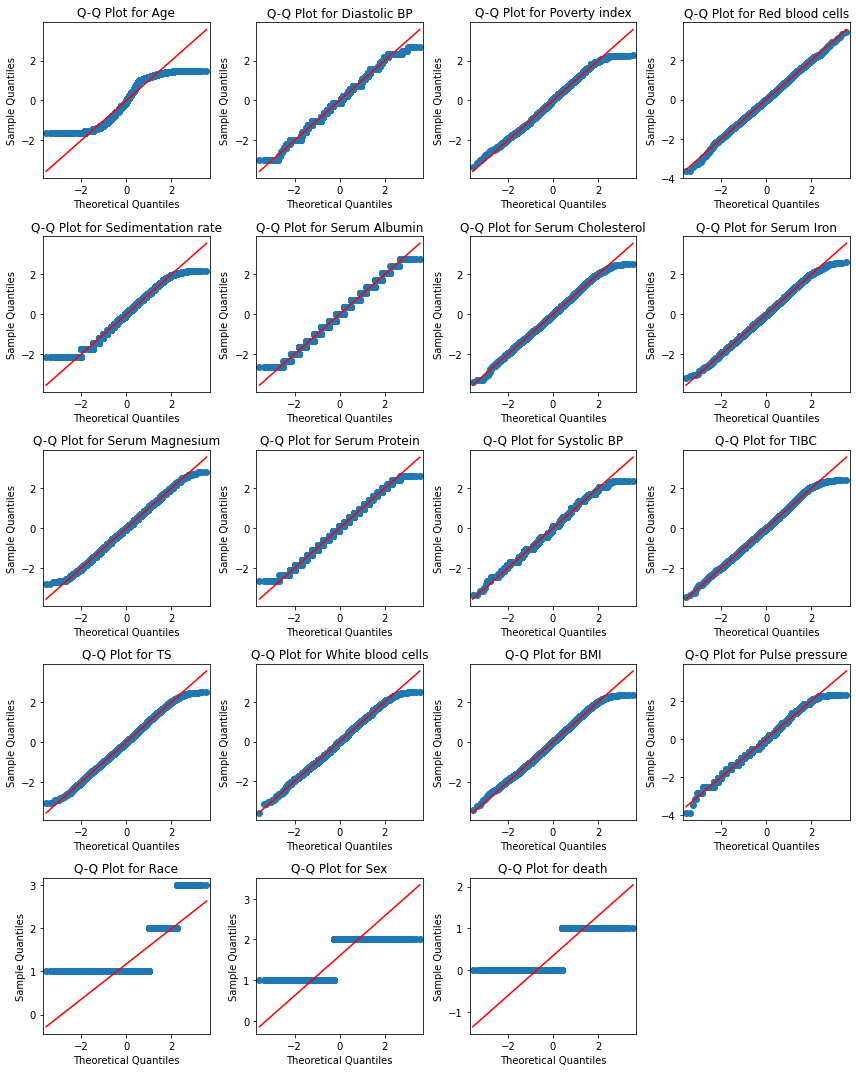

In [3]:
# Let's write the function to plot our Q-Q plots
def QQ(data):
    columns = data.columns
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 4))

    fig, axes = plt.subplots(num_rows, 4, figsize=(12, 3*num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(columns):
        ax = axes[i]
        sm.qqplot(data[feature], line='s', ax=ax)
        ax.set_title(f"Q-Q Plot for {feature}")

    # Remove any remaining empty subplots
    for j in range(num_columns, num_rows*4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


QQ(transformed_data)


## Anderson test

The Anderson-Darling test is a statistical test used to determine whether a given dataset conforms to a specific theoretical distribution, such as the normal distribution. It evaluates the goodness of fit by comparing the observed data to the expected values from the theoretical distribution. The test produces a test statistic called the Anderson-Darling statistic, which quantifies the degree of discrepancy between the observed data and the expected distribution. Higher values of the test statistic indicate a larger deviation from the expected distribution.  
To interpret the Anderson-Darling test, critical values and corresponding significance levels are provided. By comparing the computed test statistic to these critical values, one can assess whether the data significantly deviates from the assumed distribution. Typically, a significance level (e.g., $0.05$) is chosen, and if the resulting p-value is below this threshold, it suggests that the data significantly departs from the expected distribution.  
The assumptions of Anderson-Darling test:

- $H0$: The features are normally distributed.
- $H1$: The features are NOT normally distributed.


In [4]:
# First, let's write the Anderson-Starling test function
def anderson_test(data):
    alpha_list, stats_list, critical_vals_list = [], [], []
    for col in data.columns:
        result = anderson(data[col])
        stats_list.append(result.statistic)
        critical_vals_list.append(result.critical_values)
        alpha_list.append(result.significance_level)
    return alpha_list, stats_list, critical_vals_list


alpha_list, stats_list, critical_vals_list = anderson_test(transformed_data)

critical_to_alpha = dict(
    zip(np.array(critical_vals_list).flatten(), np.array(alpha_list).flatten()))

i = 0
j = 0
for critical_vals, tst_stat, alphas, feature in zip(critical_vals_list, stats_list, alpha_list, transformed_data.columns):
    for critical_val in critical_vals:
        if tst_stat > critical_val:
            i += 1
            print(
                f"Feature {feature} for significance {critical_to_alpha[critical_val]} rejects null hypothesis.")
        else:
            j += 1
            print(
                f"Feature {feature} for significance {critical_to_alpha[critical_val]} fails to reject null hypothesis.")
    print("")


Feature Age for significance 15.0 rejects null hypothesis.
Feature Age for significance 10.0 rejects null hypothesis.
Feature Age for significance 5.0 rejects null hypothesis.
Feature Age for significance 2.5 rejects null hypothesis.
Feature Age for significance 1.0 rejects null hypothesis.

Feature Diastolic BP for significance 15.0 rejects null hypothesis.
Feature Diastolic BP for significance 10.0 rejects null hypothesis.
Feature Diastolic BP for significance 5.0 rejects null hypothesis.
Feature Diastolic BP for significance 2.5 rejects null hypothesis.
Feature Diastolic BP for significance 1.0 rejects null hypothesis.

Feature Poverty index for significance 15.0 rejects null hypothesis.
Feature Poverty index for significance 10.0 rejects null hypothesis.
Feature Poverty index for significance 5.0 rejects null hypothesis.
Feature Poverty index for significance 2.5 rejects null hypothesis.
Feature Poverty index for significance 1.0 rejects null hypothesis.

Feature Red blood cells fo

In [5]:
print(
    f"Number of features rejecting H0 {i}, while number of features failing to reject H0 {j}.")


Number of features rejecting H0 92, while number of features failing to reject H0 3.
